<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/CV_Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape,iris.target.shape

((150, 4), (150,))

In [3]:
from sklearn.model_selection import cross_val_score
clf_svc_cv = svm.SVC(kernel='linear',C=1)
scores_clf_svc_cv = cross_val_score(clf_svc_cv,iris.data,iris.target,cv=5)
print(scores_clf_svc_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv.mean(), scores_clf_svc_cv.std() * 2))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)


In [4]:
#from sklearn import metrics
scores_clf_svc_cv_f1 = cross_val_score(clf_svc_cv,iris.data,iris.target,cv=5,scoring='f1_macro')
print("F1: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv_f1.mean(), scores_clf_svc_cv_f1.std()) * 2)

F1: 0.98 (+/- 0.02)F1: 0.98 (+/- 0.02)


In [5]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
clf_pipline = make_pipeline(preprocessing.StandardScaler(),svm.SVC(C=1))
scores_pipline_cv = cross_val_score(clf_pipline,iris.data,iris.target,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv_f1.mean(), scores_clf_svc_cv_f1.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [9]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro', 'f1_macro']
clf_cvs = svm.SVC(kernel='linear', C=1, random_state=0)
scores_cvs = cross_validate(clf_cvs,iris.data,iris.target,cv=5,scoring=scoring,return_train_score = False)
sorted(scores_cvs.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [10]:
print(scores_cvs['test_recall_macro'])
print("test_recall_macro: %0.2f (+/- %0.2f)" % (scores_cvs['test_recall_macro'].mean(), 
                                                scores_cvs['test_recall_macro'].std() * 2))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
test_recall_macro: 0.98 (+/- 0.03)


In [21]:
import sklearn.metrics
from sklearn.metrics.scorer import make_scorer
from sklearn import metrics
scoring_new = {'prec_macro': 'precision_macro','recall_macro': make_scorer(metrics.recall_score, average='macro')}

scores_cvs_new = cross_validate(clf_cvs,iris.data,iris.target,cv=5,scoring=scoring_new,return_train_score = False)

print(sorted(scores_cvs.keys()))
print(scores_cvs['test_recall_macro'])
print("test_recall_macro: %0.2f (+/- %0.2f)" % (scores_cvs['test_recall_macro'].mean(), 
                                                scores_cvs['test_recall_macro'].std() * 2))


print(sorted(sklearn.metrics.SCORERS.keys()))

['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
[0.96666667 1.         0.96666667 0.96666667 1.        ]
test_recall_macro: 0.98 (+/- 0.03)
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


[-0.01134791 -0.03305573 -0.11754365 -0.05298791 -0.12991543]


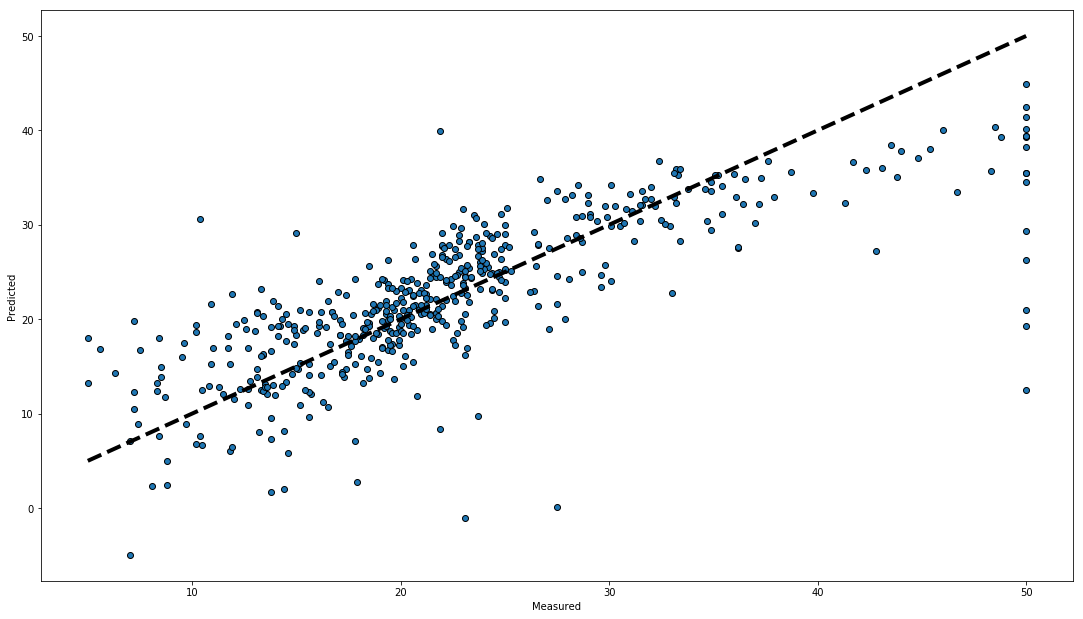

In [22]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

print(cross_val_score(lr,iris.data,iris.target,cv=5,scoring='neg_mean_squared_error'))
# cross_val_predict returns an array of the same size as y where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5)
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()